In [19]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import sqlite3

conn = sqlite3.connect('/Users/dicordova/Documents/USFQ Data Science/Fundamentos/Proyecto FDS/Cantones.db')
cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()
print("Tables in Cantones.db:", tables)


Tables in Cantones.db: [('hogar_cant',), ('poblacion_cant',), ('vivienda_cant',), ('df_renamed_table',), ('df_renamed_hogar',)]


In [21]:
conn = sqlite3.connect('/Users/dicordova/Documents/USFQ Data Science/Fundamentos/Proyecto FDS/Cantones1.db')
cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()
print("Tables in Cantones.db:", tables)

Tables in Cantones.db: [('df_renamed_vivienda',), ('filtered_df_reduced',)]


In [22]:
# Connect to first database and load table
conn1 = sqlite3.connect('/Users/dicordova/Documents/USFQ Data Science/Fundamentos/Proyecto FDS/Cantones.db')
table1 = pd.read_sql_query("SELECT * FROM df_renamed_hogar", conn1)
conn1.close()

# Connect to second database and load table
conn2 = sqlite3.connect('/Users/dicordova/Documents/USFQ Data Science/Fundamentos/Proyecto FDS/Cantones1.db')
table2 = pd.read_sql_query("SELECT * FROM df_renamed_vivienda", conn2)
conn2.close()

# Merge the DataFrames on a common column
merged_df = pd.merge(table1, table2, on=['provincia', 'nro_vivienda', 'canton_id'], how='outer')
print(merged_df.head())

   provincia  canton_id  nro_vivienda  nro_hogar  nro_dormitorios  \
0          5          1           1.0        1.0              1.0   
1          5          2           1.0        1.0              0.0   
2          5          3           1.0        1.0              2.0   
3          5          4           1.0        1.0              1.0   
4          5          5           1.0        1.0              2.0   

   espacio_cocina  tiene_inodoro  tiene_ducha  combustible_cocina  \
0             2.0            1.0          1.0                 1.0   
1             2.0            1.0          1.0                 1.0   
2             1.0            1.0          3.0                 1.0   
3             2.0            3.0          3.0                 4.0   
4             1.0            1.0          1.0                 1.0   

   fuente_agua_bebida  separa_basura_organica  separa_basura_animales  \
0                 1.0                     2.0                     1.0   
1                 1.0   

Podemos ver que las variables son categóricas, con valores no necesariamente ordenados por importancia, es decir, debemos reemplazar estos valores para poder entender la relación entre categorías de mejor manera. Sin embargo, primero debemos investigar si vale la pena quedarse con todas las columnas y qué hacer con los valores nulos. 

Combinamos ambas tablas:

In [23]:
print("Columnas actuales:")
for col in merged_df.columns:
    print(col)

Columnas actuales:
provincia
canton_id
nro_vivienda
nro_hogar
nro_dormitorios
espacio_cocina
tiene_inodoro
tiene_ducha
combustible_cocina
fuente_agua_bebida
separa_basura_organica
separa_basura_animales
separa_basura_reciclaje
tiene_perros
nro_perros
tiene_gatos
nro_gatos
tenencia_vivienda
tiene_telefono_fijo
tiene_celular
tiene_tv_pagada
tiene_internet
tiene_computadora
tiene_refrigeradora
tiene_lavadora
tiene_secadora
tiene_microondas
tiene_extractora_olores
tiene_auto
tiene_moto
fallecidos_ultimos_3_anios
nro_fallecidos
emigrantes_desde_2010
nro_emigrantes
total_hombres
total_mujeres
total_personas_x
persona_no_mencionada
zona_x
canton_x
id_vivienda_x
id_hogar
nro_dormitorios_r
registro_imputado_x
tipo_via
tipo_vivienda
ocup_viv_part
ocup_viv_colect
mat_techo
estado_techo
mat_paredes
estado_paredes
mat_piso
estado_piso
tipo_agua
fuente_agua
tipo_sanitario
electricidad_red
otra_fuente_elec
eliminacion_basura
nro_cuartos
gasto_compartido
nro_hogares
zona_y
canton_y
id_vivienda_y
total

Sabemos por el dataset que las siguientes variables del dataset Hogar (Table 1, con terminación _x) son derivadas, que por recomendación del INEC deberían conservarse. 

- Área urbana o rural
- Cantón
- Identificador de la vivienda
- Total de fallecidos de la vivienda
- Total de emigrantes de la vivienda
- Total de personas de la vivienda

In [24]:
#We take a look at the missing values
missing_counts = merged_df.isnull().sum().sort_values(ascending=False)
print("\nMissing values by column:\n", missing_counts)


Missing values by column:
 ocup_viv_colect               3070897
nro_emigrantes                3035792
nro_fallecidos                2971280
nro_gatos                     2453266
nro_perros                    1791142
emigrantes_desde_2010          696650
nro_cuartos_r                  696650
tiene_auto                     696650
tiene_moto                     696650
fallecidos_ultimos_3_anios     696650
gasto_compartido               696650
nro_cuartos                    696650
eliminacion_basura             696650
otra_fuente_elec               696650
tiene_microondas               696650
electricidad_red               696650
tipo_sanitario                 696650
fuente_agua                    696650
tipo_agua                      696650
nro_dormitorios_r              696650
estado_piso                    696650
mat_piso                       696650
estado_paredes                 696650
mat_paredes                    696650
tiene_extractora_olores        696650
tiene_lavadora        

In [25]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

# Total number of rows
total_rows = merged_df.shape[0]

# Calculate missing values in percentage
missing_percent = (merged_df.isnull().sum() / total_rows * 100).sort_values(ascending=False)

print("\nMissing values by column (percentage):\n", missing_percent)



Missing values by column (percentage):
 ocup_viv_colect               99.829300
nro_emigrantes                98.688100
nro_fallecidos                96.590931
nro_gatos                     79.751234
nro_perros                    58.226782
emigrantes_desde_2010         22.646830
nro_cuartos_r                 22.646830
tiene_auto                    22.646830
tiene_moto                    22.646830
fallecidos_ultimos_3_anios    22.646830
gasto_compartido              22.646830
nro_cuartos                   22.646830
eliminacion_basura            22.646830
otra_fuente_elec              22.646830
tiene_microondas              22.646830
electricidad_red              22.646830
tipo_sanitario                22.646830
fuente_agua                   22.646830
tipo_agua                     22.646830
nro_dormitorios_r             22.646830
estado_piso                   22.646830
mat_piso                      22.646830
estado_paredes                22.646830
mat_paredes                   22.646830

In [26]:
# We can see that the columns 'nro_hogar', 'nro_vivienda', and 'canton_id' have a lot of missing values.
# we can also see that some columns have the same information. We will drop the columns that are not derivated. 
merged_df.drop(columns=['total_fallecidos', 'total_emigrantes', 'total_personas_y', 'id_vivienda_y'], inplace=True)

In [27]:
# We know, from the data exploration, that the variables in the dataset HOGAR or Table 1 were not extracted from empty houses or houses in construction
# We can drop the rows where the variable ocup_viv_part is 3.0 or 4.0
filtered_df = merged_df[~merged_df['ocup_viv_part_r'].isin([3.0, 4.0])]


In [28]:
#We check null values again
# Total number of rows
total_rows = merged_df.shape[0]

# Calculate missing values in percentage
missing_percent = (filtered_df.isnull().sum() / total_rows * 100).sort_values(ascending=False)

print("\nMissing values by column (percentage):\n", missing_percent)


Missing values by column (percentage):
 ocup_viv_colect               85.913617
nro_emigrantes                84.772417
nro_fallecidos                82.675248
nro_gatos                     65.835551
nro_perros                    44.311099
tiene_extractora_olores        8.731147
tiene_moto                     8.731147
fallecidos_ultimos_3_anios     8.731147
emigrantes_desde_2010          8.731147
nro_cuartos_r                  8.731147
nro_dormitorios_r              8.731147
mat_techo                      8.731147
estado_techo                   8.731147
mat_paredes                    8.731147
estado_paredes                 8.731147
mat_piso                       8.731147
estado_piso                    8.731147
tipo_agua                      8.731147
fuente_agua                    8.731147
tipo_sanitario                 8.731147
electricidad_red               8.731147
otra_fuente_elec               8.731147
eliminacion_basura             8.731147
nro_cuartos                    8.731147

Gracias a la exclusión de hogares desocupados o en construcción los porcentajes de valores nulos se redujo en más del 10% para muchas variables.

In [29]:
# Continuamos con la limpieza de datos. Vamos a analizar si hay columnas con valores duplicados
# Check for duplicate rows
duplicates = filtered_df[filtered_df.duplicated()]
print("\nDuplicate rows:\n", duplicates)


Duplicate rows:
 Empty DataFrame
Columns: [provincia, canton_id, nro_vivienda, nro_hogar, nro_dormitorios, espacio_cocina, tiene_inodoro, tiene_ducha, combustible_cocina, fuente_agua_bebida, separa_basura_organica, separa_basura_animales, separa_basura_reciclaje, tiene_perros, nro_perros, tiene_gatos, nro_gatos, tenencia_vivienda, tiene_telefono_fijo, tiene_celular, tiene_tv_pagada, tiene_internet, tiene_computadora, tiene_refrigeradora, tiene_lavadora, tiene_secadora, tiene_microondas, tiene_extractora_olores, tiene_auto, tiene_moto, fallecidos_ultimos_3_anios, nro_fallecidos, emigrantes_desde_2010, nro_emigrantes, total_hombres, total_mujeres, total_personas_x, persona_no_mencionada, zona_x, canton_x, id_vivienda_x, id_hogar, nro_dormitorios_r, registro_imputado_x, tipo_via, tipo_vivienda, ocup_viv_part, ocup_viv_colect, mat_techo, estado_techo, mat_paredes, estado_paredes, mat_piso, estado_piso, tipo_agua, fuente_agua, tipo_sanitario, electricidad_red, otra_fuente_elec, eliminacion

CONCLUSIONES

No tenemos valores duplicados. Sin embargo, hay columnas que tienen información similar y debemos elegir con cuál nos quedamos. Alternativamente, mantenemos todas las columnas y sólo elegimos algunas para hacer la modelación. 

Vamos a elegir qué tipo de método usamos para los datos faltantes. 

In [30]:
# We are going to drop columns whose importance is low according to our previous analysis
filtered_df_reduced = filtered_df.drop(columns=['nro_cuartos', 'nro_dormitorios', 'nro_perros', 'nro_gatos', 'separa_basura_organica', 'separa_basura_animales', 'persona_no_mencionada', 'nro_fallecidos'])
print("\nDataFrame after dropping columns:\n", filtered_df_reduced.head())


DataFrame after dropping columns:
    provincia  canton_id  nro_vivienda  nro_hogar  espacio_cocina  \
0          5          1           1.0        1.0             2.0   
1          5          2           1.0        1.0             2.0   
2          5          3           1.0        1.0             1.0   
3          5          4           1.0        1.0             2.0   
4          5          5           1.0        1.0             1.0   

   tiene_inodoro  tiene_ducha  combustible_cocina  fuente_agua_bebida  \
0            1.0          1.0                 1.0                 1.0   
1            1.0          1.0                 1.0                 1.0   
2            1.0          3.0                 1.0                 1.0   
3            3.0          3.0                 4.0                 3.0   
4            1.0          1.0                 1.0                 1.0   

   separa_basura_reciclaje  tiene_perros  tiene_gatos  tenencia_vivienda  \
0                      2.0           1.0

In [31]:
categorias_columnas = {
    'espacio_cocina': {1.0: "Sí", 2.0: "No"},
    'tiene_inodoro': {1.0: "De uso exclusivo del hogar", 2.0: "Compartido con varios hogares", 3.0: "No tiene"},
    'tiene_ducha': {1.0: "De uso exclusivo del hogar", 2.0: "Compartido con varios hogares", 3.0: "No tiene"},
    'combustible_cocina': {
        1.0: "Gas de tanque o cilindro", 2.0: "Gas centralizado (por tubería)", 3.0: "Electricidad", 4.0: "Leña o carbón",
        5.0: "Biogás (residuos vegetales y/o animales, etc.)", 6.0: "Otro (Ej: gasolina, kerex, diésel, etc.)", 7.0: "Ninguno (no cocina)"
    },
    'fuente_agua_bebida': {
        1.0: "La beben, tal como llega al hogar", 2.0: "La compran (agua envasada en bidón, botella o funda)",
        3.0: "La hierven", 4.0: "Le ponen cloro", 5.0: "La filtran (colocan filtros en el grifo o usan purificadores)",
        6.0: "Realizan otro tratamiento"
    },
    'separa_basura_organica': {1.0: "Sí", 2.0: "No"},
    'separa_basura_animales': {1.0: "Sí", 2.0: "No"},
    'separa_basura_reciclaje': {1.0: "Sí", 2.0: "No"},
    'tiene_perros': {1.0: "Sí", 2.0: "No"},
    'tiene_gatos': {1.0: "Sí", 2.0: "No"},
    'tenencia_vivienda': {
        1.0: "Propia y totalmente pagada", 2.0: "Propia y la está pagando", 3.0: "Propia (regalada, donada, heredada o por posesión)",
        4.0: "Arrendada/anticresis", 5.0: "Prestada o cedida (no paga)", 6.0: "Por servicios"
    },
    'tiene_telefono_fijo': {1.0: "Sí", 2.0: "No"},
    'tiene_celular': {1.0: "Sí", 2.0: "No"},
    'tiene_tv_pagada': {1.0: "Sí", 2.0: "No"},
    'tiene_internet': {1.0: "Sí", 2.0: "No"},
    'tiene_computadora': {1.0: "Sí", 2.0: "No"},
    'tiene_refrigeradora': {1.0: "Sí", 2.0: "No"},
    'tiene_lavadora': {1.0: "Sí", 2.0: "No"},
    'tiene_secadora': {1.0: "Sí", 2.0: "No"},
    'tiene_microondas': {1.0: "Sí", 2.0: "No"},
    'tiene_extractora_olores': {1.0: "Sí", 2.0: "No"},
    'tiene_auto': {1.0: "Sí", 2.0: "No"},
    'tiene_moto': {1.0: "Sí", 2.0: "No"},
    'fallecidos_ultimos_3_anios': {1.0: "Sí", 2.0: "No", 9.0: "Se ignora"},
    'emigrantes_desde_2010': {1.0: "Sí", 2.0: "No", 9.0: "Se ignora"},
    'persona_no_mencionada': {1.0: "Sí", 2.0: "No", 9.0: "Se ignora"},
    'zona': {1.0: "Área Urbana", 2.0: "Área Rural"},
    'nro_cuartos_con_sala_comedor': {
        0.0: "Ninguno", 1.0: "Un dormitorio", 2.0: "Dos dormitorios", 3.0: "Tres dormitorios",
        4.0: "Cuatro dormitorios", 5.0: "Cinco dormitorios", 6.0: "Seis o más dormitorios"
    },
    'registro_imputado_hogar': {1.0: "Sí", 2.0: "No"},
    'tipo_via': {
        1.0: "Calle", 2.0: "Avenida", 3.0: "Carretera", 4.0: "Pasaje",
        5.0: "Callejón", 6.0: "Sendero", 7.0: "Camino", 8.0: "Otro"
    },
    'tipo_vivienda': {
        1.0: "Casa/villa", 2.0: "Departamento en casa o edificio", 3.0: "Cuarto/s en casa de inquilinato",
        4.0: "Mediagua", 5.0: "Rancho", 6.0: "Covacha", 7.0: "Choza", 8.0: "Otra vivienda particular",
        9.0: "Hotel, pensión, residencial u hostal", 10.0: "Cuartel militar, policía o bomberos",
        11.0: "Centro de privación de libertad/cárcel", 12.0: "Hospital, clínica, etc.",
        13.0: "Convento o institución religiosa", 14.0: "Centro de acogida y protección para niñas/os y adolescentes",
        15.0: "Residencia de adultos mayores/Asilo de ancianos", 16.0: "Internado de estudiantes",
        17.0: "Campamento de trabajo", 18.0: "Otra vivienda colectiva", 19.0: "Sin vivienda"
    },
    'ocup_viv_part': {
        1.0: "Ocupada con personas presentes", 2.0: "Ocupada con personas ausentes", 3.0: "De temporada o vacacional",
        4.0: "Desocupada", 5.0: "En construcción"
    },
    'ocup_viv_colect': {1.0: "Con residentes habituales", 2.0: "Sin residentes habituales"},
    'mat_techo': {
        1.0: "Hormigón (losa, cemento)", 2.0: "Fibrocemento, asbesto (eternit, eurolit)",
        3.0: "Zinc, aluminio (lámina o plancha metálica)", 4.0: "Teja", 5.0: "Palma, paja u hoja", 6.0: "Otro material"
    },
    'estado_techo': {1.0: "Bueno", 2.0: "Regular", 3.0: "Malo"},
    'mat_paredes': {
        1.0: "Hormigón", 2.0: "Ladrillo o bloque", 3.0: "Panel prefabricado (yeso, fibrocemento, etc.)",
        4.0: "Adobe o tapia", 5.0: "Madera", 6.0: "Caña revestida o bahareque", 7.0: "Caña no revestida", 8.0: "Otro material"
    },
    'estado_paredes': {1.0: "Bueno", 2.0: "Regular", 3.0: "Malo"},
    'mat_piso': {
        1.0: "Duela, parquet, tablón o piso flotante", 2.0: "Cerámica, baldosa, vinil o porcelanato",
        3.0: "Mármol o marmetón", 4.0: "Ladrillo o cemento", 5.0: "Tabla sin tratar", 6.0: "Caña sin tratar",
        7.0: "Tierra", 8.0: "Otro material"
    },
    'estado_piso': {1.0: "Bueno", 2.0: "Regular", 3.0: "Malo"},
    'tipo_agua': {
        1.0: "Por tubería, dentro de la vivienda",
        2.0: "Por tubería, fuera de la vivienda pero dentro del edificio, lote o terreno",
        3.0: "Por tubería, fuera del edificio, lote o terreno",
        4.0: "No recibe agua por tubería, sino por otros medios"
    },
    'fuente_agua': {
        1.0: "Empresa Pública/Municipio", 2.0: "Juntas de Agua/Organizaciones comunitarias/GAD parroquial",
        3.0: "Pozo", 4.0: "Carro o tanquero repartidor",
        5.0: "Otras fuentes (río, vertiente, acequia, canal, grieta o agua lluvia)"
    },
    'tipo_sanitario': {
        1.0: "Inodoro o escusado, conectado a red pública de alcantarillado",
        2.0: "Inodoro o escusado, conectado a pozo séptico",
        3.0: "Inodoro o escusado, conectado a biodigestor",
        4.0: "Inodoro o escusado, conectado a pozo ciego",
        5.0: "Inodoro o escusado, con descarga directa al mar, río, lago o quebrada",
        6.0: "Letrina", 7.0: "No tiene"
    },
    'electricidad_red': {1.0: "Sí", 2.0: "No"},
    'otra_fuente_elec': {
        1.0: "Planta eléctrica (generador de luz)", 2.0: "Energía solar (panel fotovoltaico)",
        3.0: "Energía eólica (a partir del viento)", 4.0: "Otra fuente (desechos vegetales y animales)",
        5.0: "No dispone"
    },
    'eliminacion_basura': {
        1.0: "Por carro recolector", 2.0: "Por contenedor municipal", 3.0: "La arroja en terreno baldío",
        4.0: "La quema", 5.0: "La entierra", 6.0: "La arroja al río, acequia, canal o quebrada", 7.0: "De otra forma"
    },
    'gasto_compartido': {1.0: "Sí", 2.0: "No"},
    'ocup_viv_part_r': {
        1.0: "Ocupada", 2.0: "De temporada o vacacional", 3.0: "Desocupada", 4.0: "En construcción"
    },
    'nro_cuartos_r': {
        1.0: "Un cuarto", 2.0: "Dos cuartos", 3.0: "Tres cuartos", 4.0: "Cuatro cuartos",
        5.0: "Cinco cuartos", 6.0: "Seis o más cuartos"
    },
    'deficit_habitacional': {
        1.0: "Dignas o aceptables", 2.0: "Déficit cualitativo (Recuperables)", 3.0: "Déficit cuantitativo (Irrecuperables)"
    },
    'registro_imputado_vivienda': {1.0: "Sí", 2.0: "No"}
}



Original numeric values:
tipo_vivienda
1     1553363
2      680171
4      161542
5      146074
3       77226
6       18095
7        3227
8        2716
9        2136
18       1396
13        718
17        446
19        416
15        144
12        140
10        124
14         84
16         39
11         24
Name: count, dtype: int64

Mapped labeled values:
tipo_vivienda_label
Casa/villa                                                     1553363
Departamento en casa o edificio                                 680171
Mediagua                                                        161542
Rancho                                                          146074
Cuarto/s en casa de inquilinato                                  77226
Covacha                                                          18095
Choza                                                             3227
Otra vivienda particular                                          2716
Hotel, pensión, residencial u hostal                    

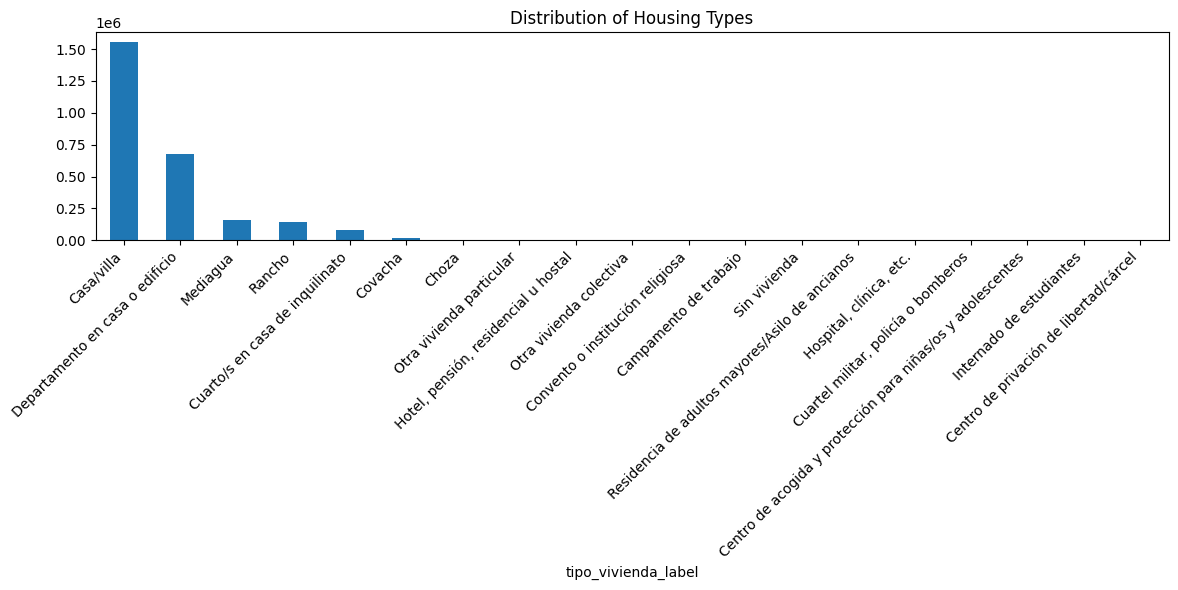

In [32]:
# 2. Apply mappings to all specified columns
for col in categorias_columnas.keys():
    if col in filtered_df_reduced.columns:
        # Create new column with '_label' suffix to keep both numeric and text versions
        filtered_df_reduced[f'{col}_label'] = filtered_df_reduced[col].map(categorias_columnas[col])
        
        # Alternatively, to replace the numeric values directly:
        # df[col] = df[col].map(categorias[col])

# 3. Verify the changes
# Check one example column
print("\nOriginal numeric values:")
print(filtered_df_reduced['tipo_vivienda'].value_counts(dropna=False))

print("\nMapped labeled values:")
print(filtered_df_reduced['tipo_vivienda_label'].value_counts(dropna=False))

# Check for missing values after mapping
print("\nMissing values after mapping:")
print(filtered_df_reduced[[f'{col}_label' for col in categorias_columnas.keys() if f'{col}_label' in filtered_df_reduced.columns]].isnull().sum())

# 4. Optional: Quick visualization of one categorical variable
import matplotlib.pyplot as plt

if 'tipo_vivienda_label' in filtered_df_reduced.columns:
    filtered_df_reduced['tipo_vivienda_label'].value_counts().plot(kind='bar', figsize=(12,6))
    plt.title("Distribution of Housing Types")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Con este paso anterior, se crean columnas nuevas con el formato _label sin modificar los valores numericos de las columnas. Esto permite que no se cambie mi df original. 


In [33]:
print("Columnas actuales:")
print(filtered_df_reduced.columns.tolist())
print(filtered_df_reduced.dtypes)
print(filtered_df_reduced.head())

Columnas actuales:
['provincia', 'canton_id', 'nro_vivienda', 'nro_hogar', 'espacio_cocina', 'tiene_inodoro', 'tiene_ducha', 'combustible_cocina', 'fuente_agua_bebida', 'separa_basura_reciclaje', 'tiene_perros', 'tiene_gatos', 'tenencia_vivienda', 'tiene_telefono_fijo', 'tiene_celular', 'tiene_tv_pagada', 'tiene_internet', 'tiene_computadora', 'tiene_refrigeradora', 'tiene_lavadora', 'tiene_secadora', 'tiene_microondas', 'tiene_extractora_olores', 'tiene_auto', 'tiene_moto', 'fallecidos_ultimos_3_anios', 'emigrantes_desde_2010', 'nro_emigrantes', 'total_hombres', 'total_mujeres', 'total_personas_x', 'zona_x', 'canton_x', 'id_vivienda_x', 'id_hogar', 'nro_dormitorios_r', 'registro_imputado_x', 'tipo_via', 'tipo_vivienda', 'ocup_viv_part', 'ocup_viv_colect', 'mat_techo', 'estado_techo', 'mat_paredes', 'estado_paredes', 'mat_piso', 'estado_piso', 'tipo_agua', 'fuente_agua', 'tipo_sanitario', 'electricidad_red', 'otra_fuente_elec', 'eliminacion_basura', 'gasto_compartido', 'nro_hogares', '

FEATURE ENGINEERING:

Las variables categoricas con valores sin un orden especifico se pueden modificar a traves de one-hot encoding, que es lo que haremos a continuacion

In [34]:
# Select the '_label' columns
label_cols = [f'{col}_label' for col in categorias_columnas.keys() if f'{col}_label' in filtered_df_reduced.columns]

# One-hot encode (text labels)
df_encoded = pd.get_dummies(filtered_df_reduced, columns=label_cols, prefix=label_cols)

print(df_encoded.head())

   provincia  canton_id  nro_vivienda  nro_hogar  espacio_cocina  \
0          5          1           1.0        1.0             2.0   
1          5          2           1.0        1.0             2.0   
2          5          3           1.0        1.0             1.0   
3          5          4           1.0        1.0             2.0   
4          5          5           1.0        1.0             1.0   

   tiene_inodoro  tiene_ducha  combustible_cocina  fuente_agua_bebida  \
0            1.0          1.0                 1.0                 1.0   
1            1.0          1.0                 1.0                 1.0   
2            1.0          3.0                 1.0                 1.0   
3            3.0          3.0                 4.0                 3.0   
4            1.0          1.0                 1.0                 1.0   

   separa_basura_reciclaje  tiene_perros  tiene_gatos  tenencia_vivienda  \
0                      2.0           1.0          2.0                3.0   


Este es solo un ejemplo del trabajo de limpieza de datos que requerira este proyecto de ciencia de datos. No es el trabajo completo para la tesis final. 

In [35]:
import sqlite3
import pandas as pd

# Connect to the database file (adjust the path as needed)
conn = sqlite3.connect('/Users/dicordova/Documents/USFQ Data Science/Fundamentos/Proyecto FDS/notebooks/mydatabase.db')

# Save the DataFrame to the database
df_encoded.to_sql('df_encoded', conn, if_exists='replace', index=False)
conn.commit()  # Commit the transaction

# List all tables in the database
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

conn.close()


Tables in the database: [('filtered_df_reduced',), ('df_encoded',)]
